# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [41]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine

url = "https://companiesmarketcap.com/tesla/revenue/"
response = requests.get(url)
if response.status_code == 200:
    soup= BeautifulSoup(response.content,'html.parser')
    table = soup.find_all ('table', class_='table')
    
#year = table[0].find_all('span',class_='year')
#table[0].find_all('img', class_="ttm-dates-info-icon info-icon tooltip-title responsive-hidden")
#table[0].find_all('td')[1:]


In [31]:
tabla = table[0]
def c_años(tabla):
    return [int(year.get_text()) for year in tabla.find_all('span', class_='year')]

def get_revenue(tabla):
    return[float(revenue.get_text().replace('$','').replace('B','')) for revenue in tabla.find_all('td') if '$' in revenue.get_text()]

#len(get_revenue(tabla)) == len(años(tabla))

años = c_años(tabla)
revenues = get_revenue(tabla)

data=[]

for año, revenue in zip(años,revenues):
    data.append((año, revenue))


df = pd.DataFrame(data, columns=['Years','Revenues'])
df

,Years,Revenues
0,2024,97.15
1,2023,96.77
2,2022,81.46
3,2021,53.82
4,2020,31.53
5,2019,24.57
6,2018,21.46
7,2017,11.75
8,2016,7.00
9,2015,4.04


In [50]:
connexion = sqlite3.connect('datos_revenues.db')  
cursor = connexion.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS RevenueData (
    Years INTEGER,
    Revenues FLOAT
)
''')

connexion.commit()

#engine = create_engine("sqlite://datos_revenues.db")

df.to_sql('tabla_revenues',con=connexion, if_exists='replace',index = False)
cursor.execute('SELECT * FROM RevenueData')
albert = cursor.fetchall()

albert



[(2024, 97.15),
 (2023, 96.77),
 (2022, 81.46),
 (2021, 53.82),
 (2020, 31.53),
 (2019, 24.57),
 (2018, 21.46),
 (2017, 11.75),
 (2016, 7.0),
 (2015, 4.04),
 (2014, 3.19),
 (2013, 2.01),
 (2012, 0.41),
 (2011, 0.2),
 (2010, 0.11),
 (2009, 0.11),
 (2024, 97.15),
 (2023, 96.77),
 (2022, 81.46),
 (2021, 53.82),
 (2020, 31.53),
 (2019, 24.57),
 (2018, 21.46),
 (2017, 11.75),
 (2016, 7.0),
 (2015, 4.04),
 (2014, 3.19),
 (2013, 2.01),
 (2012, 0.41),
 (2011, 0.2),
 (2010, 0.11),
 (2009, 0.11),
 (2024, 97.15),
 (2023, 96.77),
 (2022, 81.46),
 (2021, 53.82),
 (2020, 31.53),
 (2019, 24.57),
 (2018, 21.46),
 (2017, 11.75),
 (2016, 7.0),
 (2015, 4.04),
 (2014, 3.19),
 (2013, 2.01),
 (2012, 0.41),
 (2011, 0.2),
 (2010, 0.11),
 (2009, 0.11)]

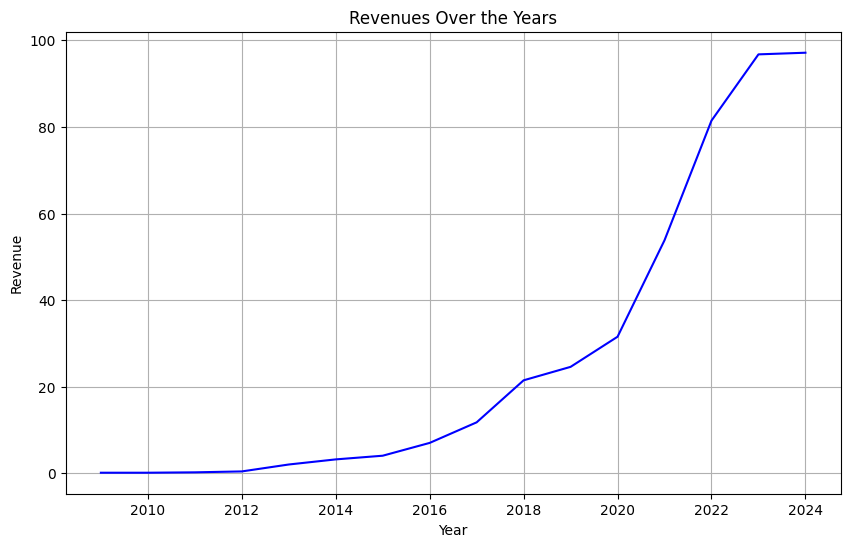

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(df['Years'], df['Revenues'], color='b')
plt.title('Revenues Over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

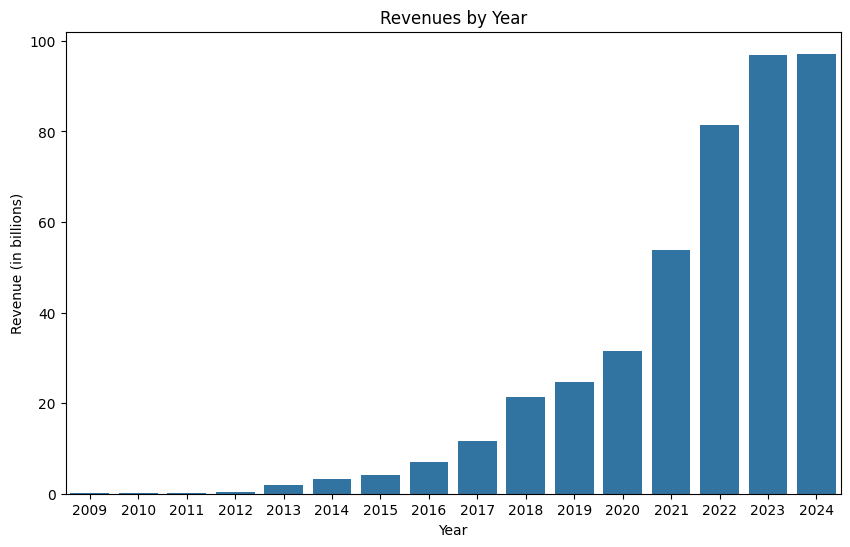

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Years', y='Revenues', data=df)
plt.title('Revenues by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

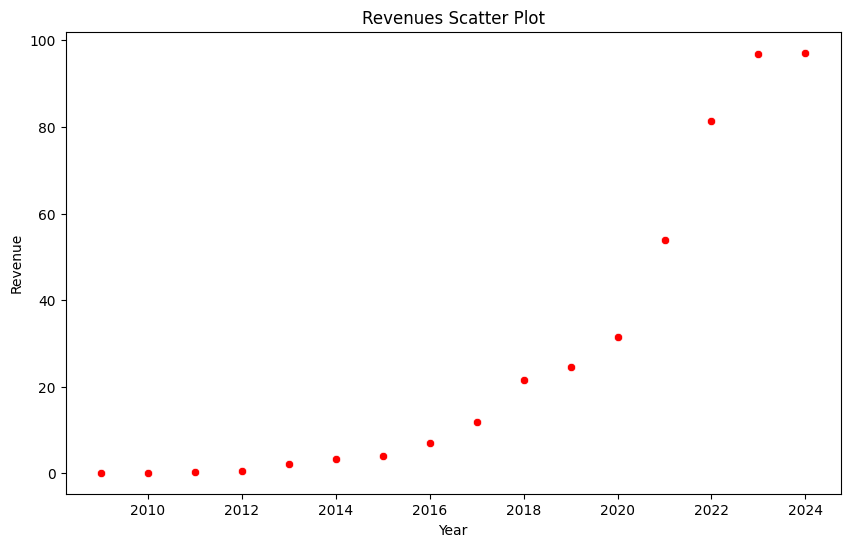

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years', y='Revenues', data=df, color='red')
plt.title('Revenues Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()